# 07 - Model Evaluation & Comparison

**Goal:** Consolidate results from all models trained on the new dataset.
**Output:** Figures and Tables saved to `results/new_dataset_analysis`.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

METRICS_DIR = Path('../results/new_dataset_analysis/metrics')
FIG_DIR = Path('../results/new_dataset_analysis/figures')
FIG_DIR.mkdir(parents=True, exist_ok=True)

print("Loading Metrics...")
results_files = ['04_baseline_models_results.json', '05_advanced_models_detailed_results.json', '06_neural_network_results.json']
all_results = {}

for f in results_files:
    path = METRICS_DIR / f
    if path.exists():
        with open(path) as json_file:
            data = json.load(json_file)
            all_results.update(data)
    else:
        print(f"Warning: {f} not found.")

print(f"Models Found: {list(all_results.keys())}")

Loading Metrics...
Models Found: ['LogisticRegression', 'DecisionTree', 'RandomForest', 'XGBoost', 'NeuralNetwork']


                Model   ROC_AUC    PR_AUC  Recall_Fraud  Precision_Fraud  \
3             XGBoost  0.965221  0.000000      0.846939         0.882979   
2        RandomForest  0.965392  0.000000      0.795918         0.896552   
1        DecisionTree  0.856888  0.000000      0.714286         0.707071   
4       NeuralNetwork  0.964674  0.732109      0.224490         0.709677   
0  LogisticRegression  0.972032  0.000000      0.918367         0.060852   

   F1_Fraud  
3  0.864583  
2  0.843243  
1  0.710660  
4  0.341085  
0  0.114141  


C:\Users\Faheem\AppData\Local\Temp\ipykernel_14076\1966667174.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_res, x='Model', y='F1_Fraud', palette='viridis')


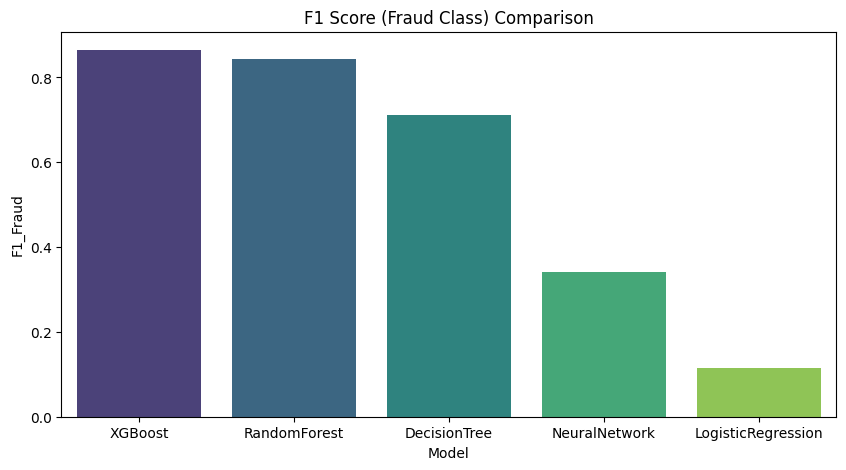

In [2]:
# Create Comparison DataFrame
rows = []
for model, metrics in all_results.items():
    rows.append({
        'Model': model,
        'ROC_AUC': metrics.get('roc_auc', 0),
        'PR_AUC': metrics.get('pr_auc', 0),
        'Recall_Fraud': metrics['report']['1']['recall'],
        'Precision_Fraud': metrics['report']['1']['precision'],
        'F1_Fraud': metrics['report']['1']['f1-score']
    })

df_res = pd.DataFrame(rows).sort_values('F1_Fraud', ascending=False)
print(df_res)

# Save Results
df_res.to_csv(METRICS_DIR / '07_consolidated_model_metrics.csv', index=False)

# Visual comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=df_res, x='Model', y='F1_Fraud', palette='viridis')
plt.title('F1 Score (Fraud Class) Comparison')
plt.savefig(FIG_DIR / '07_model_comparison_f1.png')
plt.show()